In [50]:
import streamlit as st
import pandas as pd 
import numpy as np   
import seaborn  as sns  
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline 
from ipywidgets import interact
from sklearn.impute import SimpleImputer

ModuleNotFoundError: No module named 'streamlit'

In [2]:
def wrangle (filepath): 
    """
    This function reads in a csv file and returns a pandas dataframe.
    """
    df = pd.read_csv(filepath)
    # NO MISSING VALUES
    # Remove outliers from the "pop" column
    low,high = df["pop"].quantile([0.1,0.9])
    pop = df["pop"].between(low, high)
    df = df[pop]
    # NO LEAKY FEATURES
    # NO MULTICOLLINEARITY
    #
    return df   

In [3]:
df = wrangle('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1362 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1362 non-null   object 
 1   year       1362 non-null   int64  
 2   pop        1362 non-null   float64
 3   continent  1362 non-null   object 
 4   lifeExp    1362 non-null   float64
 5   gdpPercap  1362 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 74.5+ KB


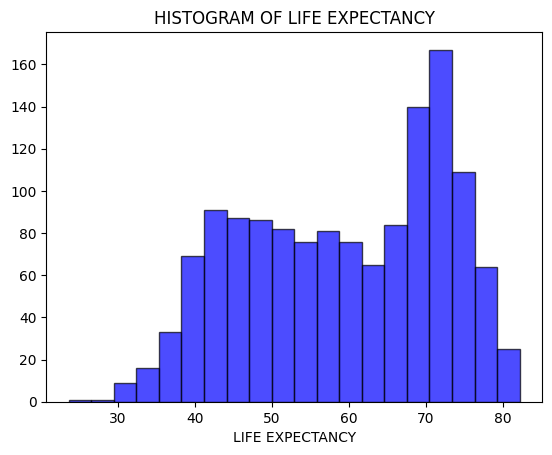

In [5]:
plt.hist(df["lifeExp"], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("LIFE EXPECTANCY")
plt.title("HISTOGRAM OF LIFE EXPECTANCY");

sns.pairplot(data= df,x="Country", y="gdpPercap",)
plt.xlabel("COUNTRIES")
Plt.ylabel("GDP")
plt.title("GDP PER CAPITAL OF EACH COUNTRY")

In [6]:
df.describe()[["gdpPercap", "lifeExp", "pop"]]


,gdpPercap,lifeExp,pop
count,1362.000000,1362.000000,1.362000e+03
mean,6794.845551,59.423761,1.137516e+07
std,8216.341760,12.866756,1.175597e+07
min,312.188423,23.599000,9.601550e+05
25%,1198.017212,48.135000,3.422760e+06
50%,3633.461102,60.492000,7.023596e+06
75%,9067.325233,70.808750,1.429903e+07
max,59265.477140,82.208000,5.443356e+07


In [7]:
cor = df.select_dtypes(include=[np.number]).drop(columns="gdpPercap").corr()  

<Axes: >

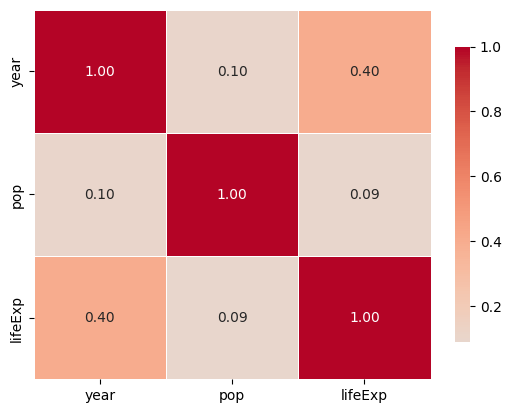

In [8]:
sns.heatmap(cor, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8}) 

In [9]:
df.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [10]:
df["continent"].nunique()

5

In [11]:
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


# E.D.A

In [12]:
dfs = df.groupby("continent")["gdpPercap"].head()
fig = px.bar(df,x="continent", y="gdpPercap", color="continent", barmode="group")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(marker=dict(line=dict(width=1, color='RGB(0, 0, 0)')))
fig.update_layout(title="GDP PER CAPITA BY CONTINENT", xaxis_title="CONTINENT", yaxis_title="GDP PER CAPITA")

In [13]:
dfh= df.groupby("country") ["gdpPercap"].max().reset_index()
dfh = dfh.sort_values(by="gdpPercap", ascending=False).head(10)
fig = px.bar(dfh, x="country", y="gdpPercap", color="gdpPercap")
fig.update_layout(title="COUNTRY WITH THE HIGHEST GDP PER CAPITA", xaxis_title="COUNTRY", yaxis_title="GDP PER CAPITA")

In [14]:
dfh= df.groupby("country") ["gdpPercap"].max().reset_index()
dfh = dfh.sort_values(by="gdpPercap", ascending=False).tail(10)
fig = px.bar(dfh, x="country", y="gdpPercap", color="gdpPercap")
fig.update_layout(title="COUNTRY WITH THE LOWEST GDP PER CAPITA", xaxis_title="COUNTRY", yaxis_title="GDP PER CAPITA")

In [15]:
dfh= df.groupby("country") ["pop"].max().reset_index()
dfh = dfh.sort_values(by="pop", ascending=False).head(10)
fig = px.bar(dfh, x="country", y="pop", color="pop")
fig.update_layout(title="COUNTRY WITH THE HIGHEST POPULATION", xaxis_title="COUNTRY", yaxis_title="POPULATION")

In [16]:
dfh= df.groupby("country") ["pop"].max().reset_index()
dfh = dfh.sort_values(by="pop", ascending=True).head(10)
fig = px.bar(dfh, x="country", y="pop", color="pop")
fig.update_layout(title="COUNTRY WITH THE LOWEST GDP PER CAPITA", xaxis_title="COUNTRY", yaxis_title="POPULATION")

In [17]:
dfp = df.groupby("continent") ["pop"].max().reset_index()
dfp = dfp.sort_values(by="pop", ascending=False).head()
fig = px.bar(dfp, x="continent", y="pop", color="pop")
fig.update_traces(marker=dict(line=dict(width=1, color='RGB(0, 0, 0)')))
fig.update_layout(title="POPULATION BY CONTINENT", xaxis_title="CONTINENT", yaxis_title="POPULATION")

In [18]:
popu = df.groupby("continent") ["lifeExp"].max().reset_index()
fig = px.bar(popu,x="continent", y="lifeExp", color="continent", text="lifeExp")
fig.update_traces(marker=dict(line=dict(width=1, color='RGB(0, 0, 0)')))
fig.update_layout(title="LIFE EXPECTATION BY CONTINENT", xaxis_title="CONTINENT", yaxis_title="lifeExp")

In [19]:
popu = df.groupby("country") ["lifeExp"].max().reset_index().sort_values(by="lifeExp",ascending=True).head(10)
fig = px.bar(popu,x="country", y="lifeExp", color="country", text="lifeExp")
fig.update_traces(marker=dict(line=dict(width=1, color='RGB(0, 0, 0)')))
fig.update_layout(title="LIFE EXPECTATION BY COUNTRY", xaxis_title="COUNTRY", yaxis_title="lifeExp")

In [20]:
popu = df.groupby("country") ["lifeExp"].max().reset_index().sort_values(by="lifeExp",ascending=False).head(10)
fig = px.bar(popu,x="country", y="lifeExp", color="country", text="lifeExp")
fig.update_traces(marker=dict(line=dict(width=1, color='RGB(0, 0, 0)')))
fig.update_layout(title="LIFE EXPECTATION BY LAST 1O COUNTRIES", xaxis_title="COUNTRY", yaxis_title="lifeExp")

In [21]:
df["country"].value_counts()["Zimbabwe"]

12

# Spliting data into  X and y (TRAIN)


In [22]:
target = "gdpPercap"
features = ["country","year","pop","continent","lifeExp"]
y_train = df[target]
X_train = df[features]

In [23]:
X_train, X_test, y_train, y_test = train_test_split( 
    X_train, y_train,
    test_size=0.2, 
    random_state=42)

# BASELINING

In [24]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_test)
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
print("MEAN GDP PER CAPITA: ", round(y_mean,2))
print("MAE of Baseline Model: ", baseline_mae.round(2))

MEAN GDP PER CAPITA:  6662.58
MAE of Baseline Model:  6243.86


In [25]:
# Column Wise  preprocessor with correct column names
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["year", "pop", "lifeExp"]),  # Numerical columns
        ('cat', OneHotEncoder(), ["country", "continent"])     # Categorical columns
    ]
)

# Make pipeline 
model = make_pipeline(
    preprocessor,
    Ridge()
)

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'pop', 'lifeExp']),
                                                 ('cat', OneHotEncoder(),
                                                  ['country', 'continent'])])),
                ('ridge', Ridge())])

In [26]:
y_pred_train = model.predict(X_train)
print("TRAINING MAE:", mean_absolute_error(y_train,y_pred_train).round(2))
print("TRAINING RMSE :", root_mean_squared_error(y_train,y_pred_train).round(2))
print("TRAINING R2", r2_score(y_train,y_pred_train))

TRAINING MAE: 2332.08
TRAINING RMSE : 3489.68
TRAINING R2 0.8145363633940635


In [27]:
X_test["gdpPercap"] = y_test
X_test["gdpPercap_pred"] = model.predict(X_test[features])
y_pred_test = model.predict(X_test[features]) 
print("TESTING MAE:", mean_absolute_error(y_test,y_pred_test).round(2))
print("TESTING RMSE :", root_mean_squared_error(y_test,y_pred_test).round(2))
print("TESTING R2", r2_score(y_test,y_pred_test))

TESTING MAE: 2572.26
TESTING RMSE : 3878.43
TESTING R2 0.7974881208677917


# COMMUNICATE RESULT

In [31]:
# Extract feature names from the preprocessor
coefficients = model.named_steps["ridge"].coef_
features = model.named_steps["columntransformer"].get_feature_names_out()
feat_imp = pd.Series(coefficients, index=features)
feat_imp

num__year                    2347.488151
num__pop                    -1436.514880
num__lifeExp                  993.913403
cat__country_Afghanistan    -4651.921007
cat__country_Albania       -10359.353009
                                ...     
cat__continent_Africa       -5887.422177
cat__continent_Americas     -2868.110083
cat__continent_Asia          -622.330493
cat__continent_Europe        4209.100504
cat__continent_Oceania       5168.762249
Length: 135, dtype: float64

In [32]:
df.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [41]:
def make_prediction(country,year,pop,continent, lifeExp):
    """
    This function takes a model and a test set and returns the predictions.
    """
    data={"country":country,
          "year":year,
          "pop":pop,
          "continent":continent,
          "lifeExp":lifeExp}
    df = pd.DataFrame(data, index=[0])


    prediction = model.predict(df).round(2)[0]
    return f"PREDICTED G.D.P:{prediction}"


In [45]:
make_prediction("Nigeria",1952,8425333.0,"Africa", 28.801)


'PREDICTED G.D.P:1749.85'

In [38]:
def plot_predictions(y_test, y_pred):
    """
    This function takes the true values and the predicted values and plots them.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("True vs Predicted Values")

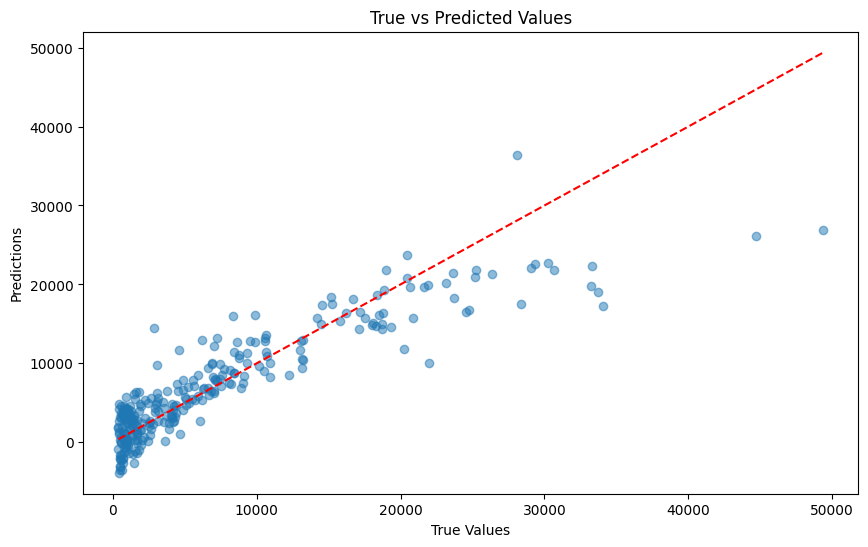

In [39]:
plot_predictions(y_test, y_pred_test)
def plot_residuals(y_test, y_pred):
    """
    This function takes the true values and the predicted values and plots the residuals.
    """
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")      

In [ ]:

interact(
    make_prediction,
    country=df["country"].unique(),
    year=df["year"].unique(),
    pop=df["pop"].unique(),
    continent=df["continent"].unique(),
    lifeExp=df["lifeExp"].unique()
);


interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

In [51]:
# Conclusion from the above analysis

print("Conclusion:")
print(
    "The Ridge regression model was trained to predict GDP per capita using country, year, population, continent, and life expectancy.\n"
    "The baseline MAE (using the mean) was {:.2f}, while the model's MAE on the test set was {:.2f}.".format(baseline_mae, mean_absolute_error(y_test, y_pred_test))
)
print(
    "This indicates the model provides a better fit than the baseline. Feature importance analysis shows both numerical and categorical features contribute to predictions.\n"
    "However, some predictions are negative or far from actual values, suggesting further model tuning or feature engineering could improve performance."
)

Conclusion:
The Ridge regression model was trained to predict GDP per capita using country, year, population, continent, and life expectancy.
The baseline MAE (using the mean) was 6243.86, while the model's MAE on the test set was 2572.26.
This indicates the model provides a better fit than the baseline. Feature importance analysis shows both numerical and categorical features contribute to predictions.
However, some predictions are negative or far from actual values, suggesting further model tuning or feature engineering could improve performance.


In [ ]:
!pip install streamlit pandas


  Using cached streamlit-1.45.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached protobuf-6.31.0-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached narwhals-1.40.0-py3-none-any.whl.metadata (11 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)


   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB ? eta -:--:--
   ---- -------------------------

In [1]:
import streamlit as st
st.title("GDP Per Capita Prediction Dashboard") 

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
!pip install streamlit